In [2]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# data
df = pd.read_csv('mtcars.csv')

### Inspection

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape
# 12 columns, 32 rows

(32, 12)

In [6]:
df.info()
# 1 column of categorical data: model
# 11 columns of numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
# statistical summary of data
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
# check for missing values
df.isnull().sum()
# no missing values

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [9]:
# check/drop duplicates
data = df.drop_duplicates(subset = 'model')
data
# no duplicates, each represents a different model

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [10]:
# check for balance
df.value_counts('model')
# balanced - equal amount of cases per category

model
AMC Javelin            1
Cadillac Fleetwood     1
Valiant                1
Toyota Corona          1
Toyota Corolla         1
Porsche 914-2          1
Pontiac Firebird       1
Merc 450SLC            1
Merc 450SL             1
Merc 450SE             1
Merc 280C              1
Merc 280               1
Merc 240D              1
Merc 230               1
Mazda RX4 Wag          1
Mazda RX4              1
Maserati Bora          1
Lotus Europa           1
Lincoln Continental    1
Hornet Sportabout      1
Hornet 4 Drive         1
Honda Civic            1
Ford Pantera L         1
Fiat X1-9              1
Fiat 128               1
Ferrari Dino           1
Duster 360             1
Dodge Challenger       1
Datsun 710             1
Chrysler Imperial      1
Camaro Z28             1
Volvo 142E             1
dtype: int64

### Visualization

In [11]:
# list the column names
list(df.columns)

['model',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb']

<AxesSubplot:xlabel='cyl', ylabel='count'>

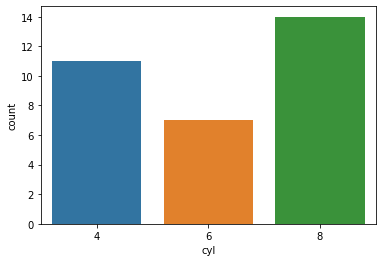

In [12]:
# visual of cyl column
sns.countplot(x = 'cyl', data = df)
# plt.show() may be necessary
# count of cars with that specific number of cylinders

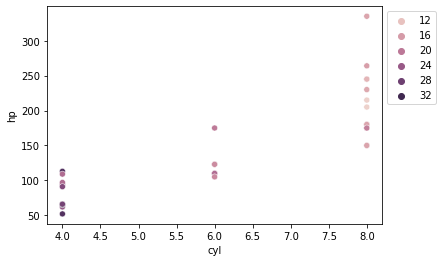

In [13]:
# variable relationships - compare cyl with hp, by mpg
sns.scatterplot(x = 'cyl', y = 'hp', hue = 'mpg', data = df)
# legend outside of graph
plt.legend(bbox_to_anchor = (1,1), loc = 2)
# plt.show()
# cars with the least mpg: have the most hp & cyl
# cars that get 32 mpg: appear to only have 4 cyl & less than 125 hp

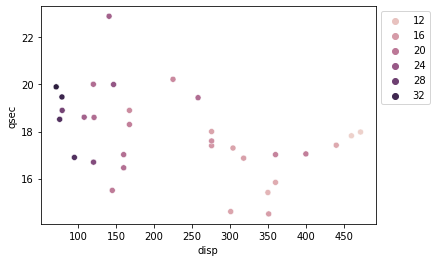

In [14]:
# compare disp with qsec, by mpg
sns.scatterplot(x = 'disp', y = 'qsec', hue = 'mpg', data = df)
# legend outside of graph
plt.legend(bbox_to_anchor = (1,1), loc = 2)
# plt.show()
# cars with 32 mpg: have middle of the road qsec, yet lowest disp
# cars with 12 mpg: have qsec of 18 and below, with disp of 275 and up

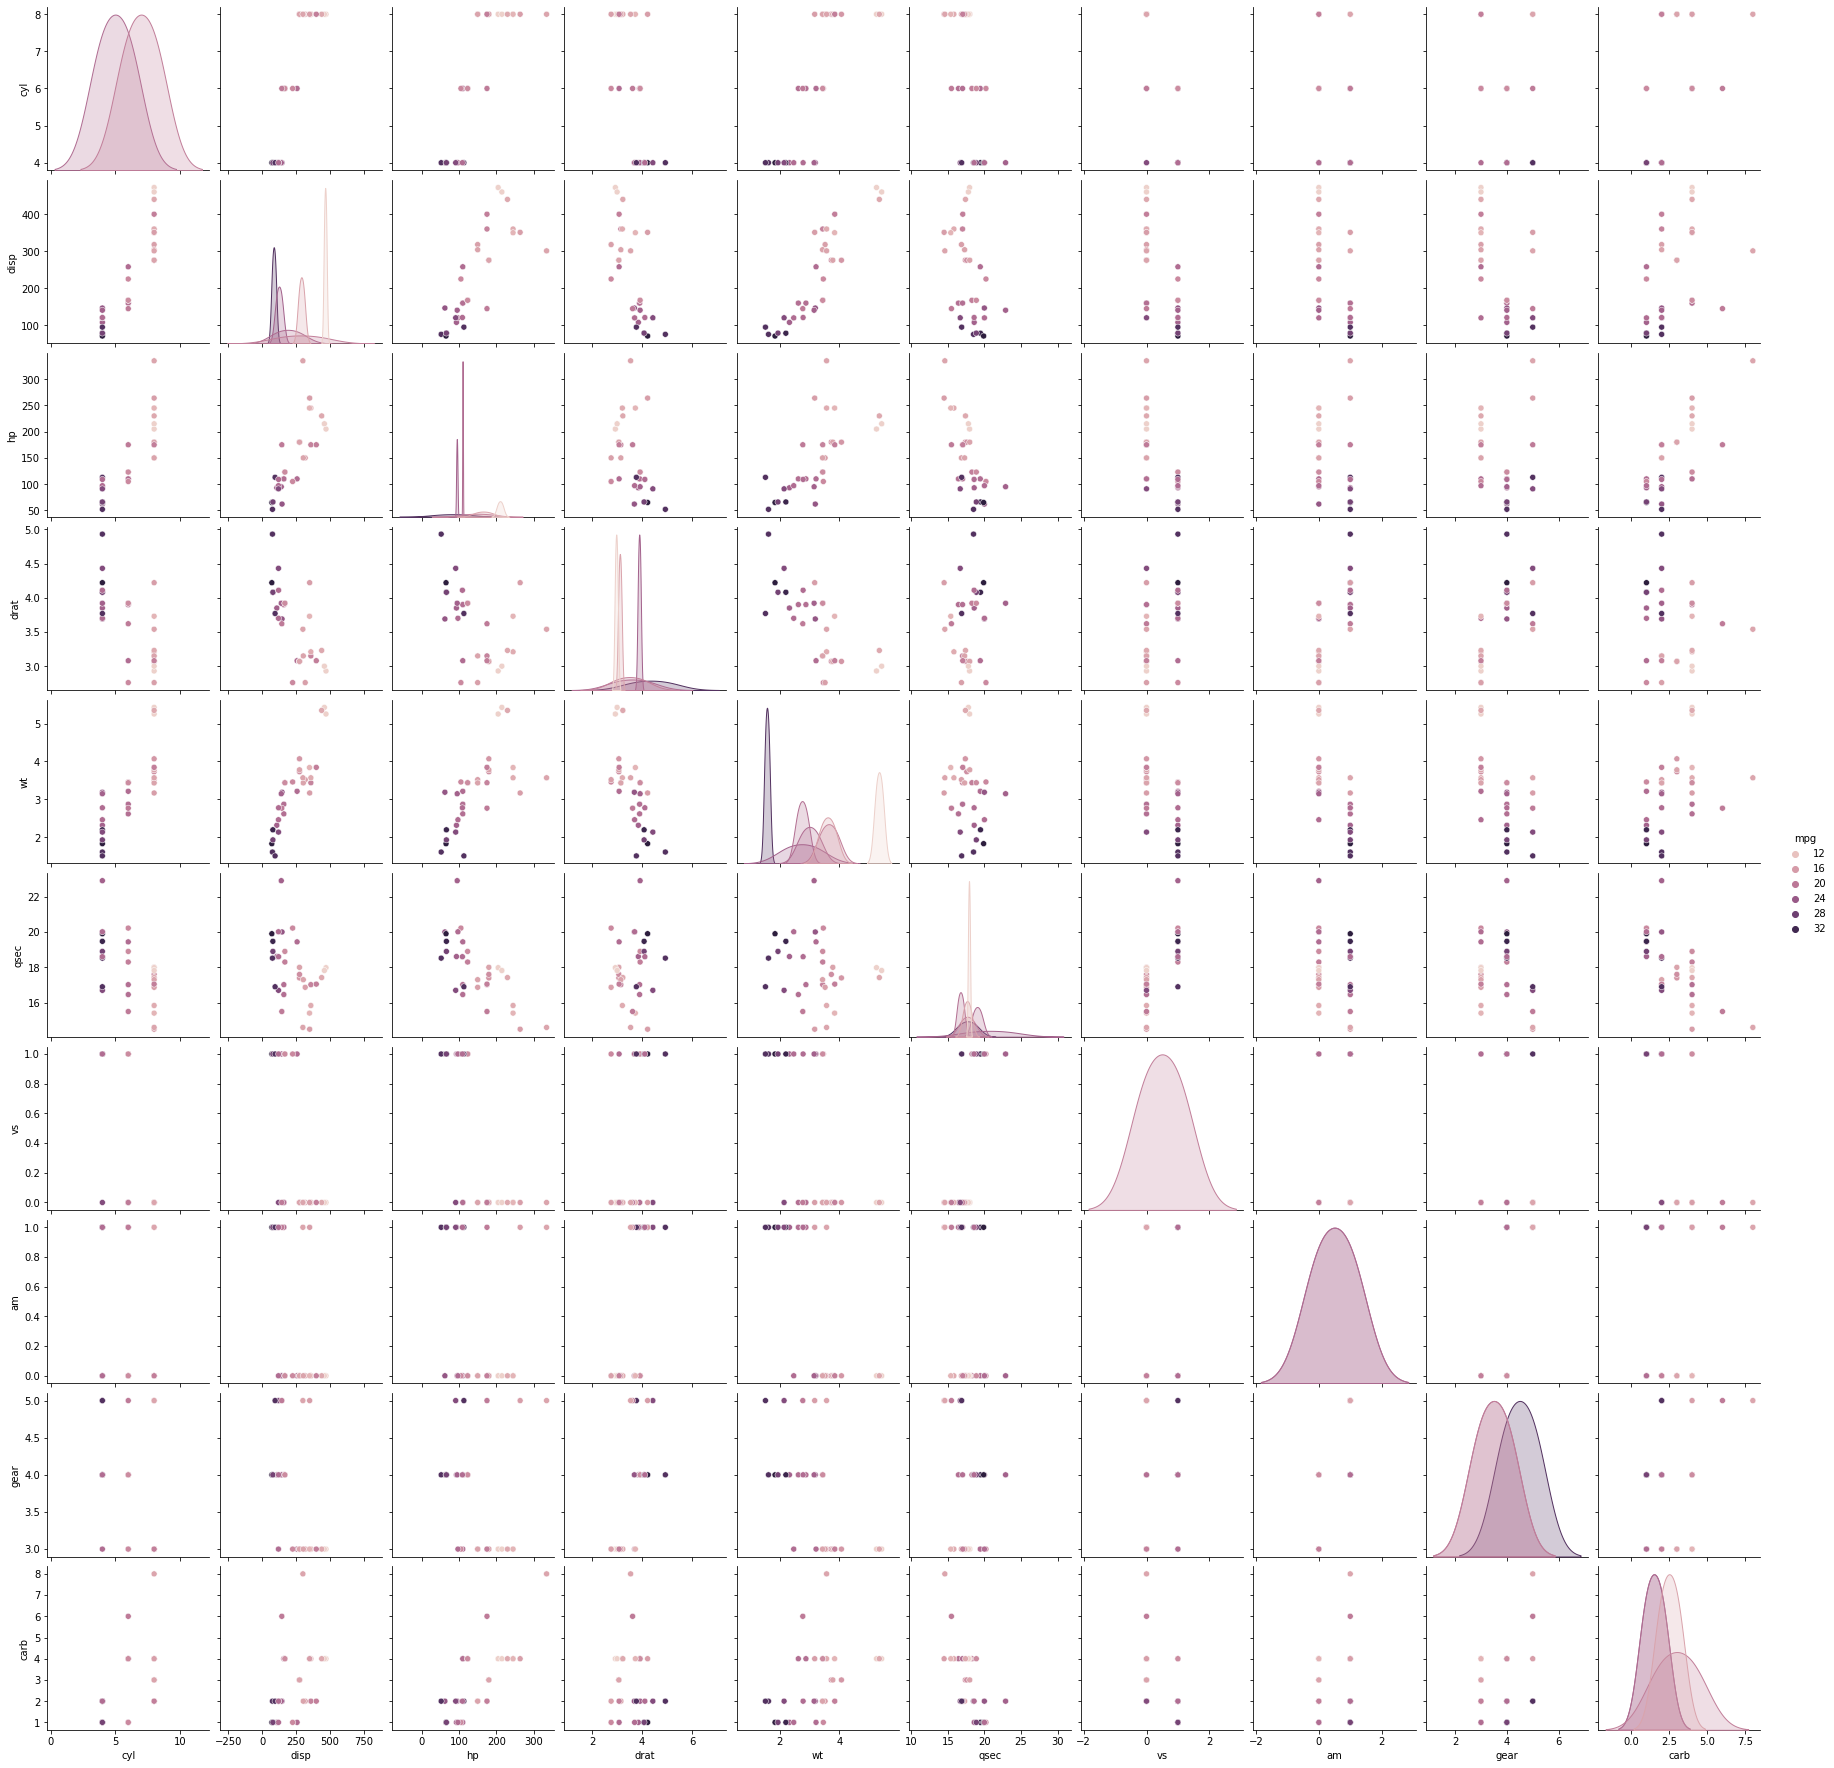

In [15]:
# pairs plot to view all column relationships - often used in multivariate analysis
sns.pairplot(df, hue = 'mpg')

(array([ 4.,  4., 11.,  6.,  6.,  0.,  1.]),
 array([14.5, 15.7, 16.9, 18.1, 19.3, 20.5, 21.7, 22.9]),
 <BarContainer object of 7 artists>)

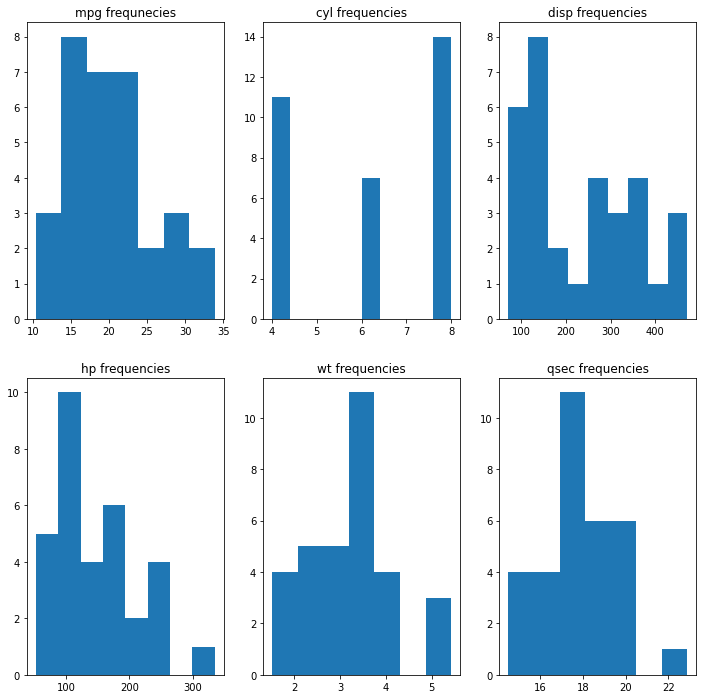

In [16]:
# histograms to view frequencies
fug, axes = plt.subplots(2, 3, figsize = (12, 12))

axes[0,0].set_title('mpg frequnecies')
axes[0,0].hist(df['mpg'], bins = 7)
# apporx 8 cars have an mpg of 15

axes[0,1].set_title('cyl frequencies')
axes[0,1].hist(df['cyl'])
# cars with 8 cyl are most common in this data
# 4 cyl cars are second, followed by 6 cyl cars in the middle

axes[0,2].set_title('disp frequencies')
axes[0,2].hist(df['disp'], bins = 9)
# approx. 8 cars have most common disp of 150

axes[1,0].set_title('hp frequencies')
axes[1,0].hist(df['hp'], bins = 8)
# 10 cars seem to have a disp of 100

axes[1,1].set_title('wt frequencies')
axes[1,1].hist(df['wt'], bins = 7)
# appears that 10 cars have a wt between 3 and 4

axes[1,2].set_title('qsec frequencies')
axes[1,2].hist(df['qsec'], bins = 7)
# seems over 10 cars have a qsec in between 17 & 18

<AxesSubplot:title={'center':'mtcars'}>

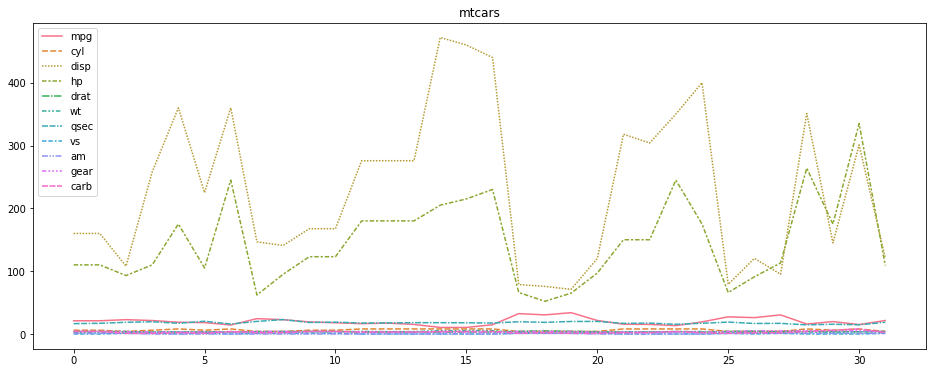

In [17]:
## lineplot
plt.figure(figsize = (16, 6))
plt.title ("mtcars")
sns.lineplot(data= df)

In [18]:
y = df['model']
x = df['mpg']

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg', ylabel='model'>

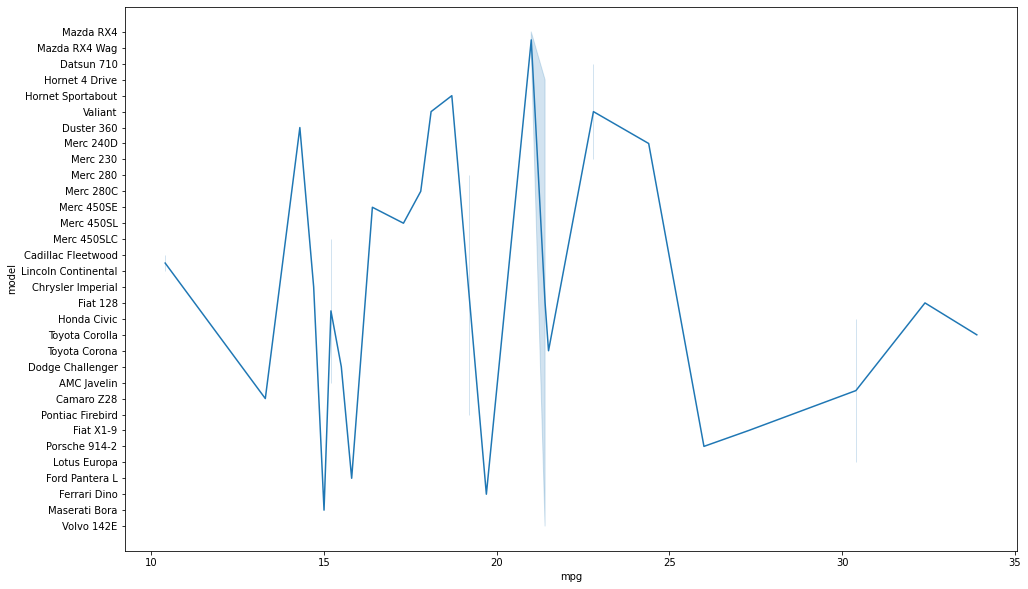

In [19]:
# lineplot with confidence intervals
plt.figure(figsize = (16, 10))
sns.lineplot(x, y, data = df)

### Predicting mpg above or below 20

### Decision Tree

In [20]:
df['mpg'].unique()

array([21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 19.2, 17.8, 16.4, 17.3,
       15.2, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 13.3, 27.3, 26. ,
       15.8, 19.7, 15. ])

In [21]:
df['mpgDummy_greaterThan_20'] = np.where(df['mpg'] > 20, 1, 0)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpgDummy_greaterThan_20
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


In [22]:
# set x1 & y1
x1 = df.drop(['model', 'mpg', 'mpgDummy_greaterThan_20'], axis=1)
y1 = df['mpgDummy_greaterThan_20']

In [23]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=76)

In [24]:
# decison tree
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [25]:
# predictions
treePredictions = decisionTree.predict(x_test)

In [26]:
# confusion matrix
print(confusion_matrix(y_test, treePredictions))

[[7 0]
 [0 3]]


In [27]:
# report on model fit
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Random Forest

In [28]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

In [29]:
# model fit
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[7 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [30]:
# feature importance
feature_importances = pd.Series(forest.feature_importances_, index=x1.columns)
feature_importances

cyl     0.136259
disp    0.183571
hp      0.277286
drat    0.076068
wt      0.171316
qsec    0.051662
vs      0.019577
am      0.018005
gear    0.041736
carb    0.024521
dtype: float64

In [31]:
# ordered
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

hp      0.277286
disp    0.183571
wt      0.171316
cyl     0.136259
drat    0.076068
qsec    0.051662
gear    0.041736
carb    0.024521
vs      0.019577
am      0.018005
dtype: float64


<AxesSubplot:>

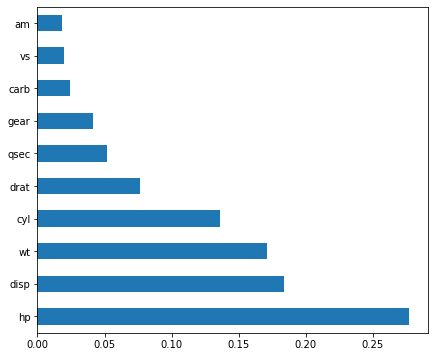

In [32]:
# visual of feature importances
feature_importances.plot(kind='barh', figsize=(7,6))

In [33]:
list(df.columns)

['model',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb',
 'mpgDummy_greaterThan_20']